<a href="https://colab.research.google.com/github/ssanchezgoe/iue_curso_ia/blob/main/nb_google_colab/s08_ml_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <tr>
     <th><p><img alt="Colaboratory logo" height="120 px" src="http://www.redttu.edu.co/es/wp-content/uploads/2016/01/iue.png" align="left" hspace="10px" vspace="0px"></p></th> 
     <th><h1>  Algoritmos de ML II </h1></th>
  </tr>

<p><a name="contents"></a></p>

# Contenido Sesi√≥n 8: Clasificaci√≥n:

- <a href="#msel">1. Selecci√≥n de Modelos.</a><br>
 - <a href="#mod_val">1.1 Validaci√≥n del modelo</a><br>
 - <a href="#bias_var">1.2 Compensaci√≥n del sesgo/varianza</a><br>
 - <a href="#val_cur">1.3 Curvas de validaci√≥n</a><br>
 - <a href="#lea_cur">1.4 Curvas de aprendizaje</a><br>
 - <a href="#bstrap">1.5 Bootstrapping.</a><br>
 - <a href="#g_search">1.6 Grid search.</a><br>
- <a href="#intro">2. Clasificaci√≥n.</a><br>
 - <a href="#svm">2.1. M√°quinas de soporte vectorial</code></a><br>
 - <a href="#reg_log">2.2. Regresi√≥n log√≠stica.</a><br>



# 1. Selecci√≥n de Modelos:
<p><a name="msel"></a></p>

[[Contenidos]](#contents)

En las sesiones anteriores hemos visto la receta b√°sica de c√≥mo aplicar un modelo de aprendizaje supervisado en ML.

* Escoger una clase de modelo
* Escoger los hiperpar√°metros del modelo
* Ajustar el modelo a los datos de entrenamiento
* Usar el modelo para predecir etiquetas para nuevos datos

La elecci√≥n del modelo y de los hiperpar√°metros es tal vez la parte m√°s importante para darle un uso efectivo a estas herramientas y t√©cnicas. Para tomar una decisi√≥n acertada respecto a qu√© modelo e hiperpar√°metros elegir, necesitamos una forma de validar que estos se ajusten bien a los datos.


## 1.1 Validaci√≥n del modelo
<p><a name="mod_val"></a></p>

[[Contenidos]](#contents)

En principio, la validaci√≥n del modelo es muy simple: despu√©s de elegir un modelo y sus hiperpar√°metros, podemos estimar qu√© tan efectivo es este al aplicarlo a algunos de los datos de entrenamiento y comparar la predicci√≥n con el valor conocido. Podemos tener una mejor idea del rendimiento de un modelo haciendo lo siguiente: Extraemos un subconjunto de los datos de entrenamiento y luego usamos este subconjunto para verificar el rendimiento del modelo. Una desventaja de usar este m√©todo para la validaci√≥n del modelo es que hemos perdido una parte de nuestros datos en el entrenamiento del modelo.

Una forma de resolver esto es utilizar lo que se conoce como *validaci√≥n cruzada* (VC): hacer una secuencia de ajustes donde cada subconjunto de datos se use como un conjunto de entrenamiento y como un conjunto de validaci√≥n. La siguiente figura ilustra el proceso

![picture](https://www.analyticslane.com/wp-content/uploads/2018/07/validacion_cruzada.jpeg)

Dividimos los datos en tres grupos, y usamos cada uno de ellos para evaluar el ajuste del modelo en los otros 2/3 de los datos. Como salida tendremos tres puntajes de desempe√±o del modelo, que podr√≠amos combinar (por ejemplo, tomando la media) para obtener una mejor medici√≥n del rendimiento del modelo global. Esto ser√≠a bastante tedioso de hacer a mano, por lo que podemos usar el m√≥dulo `cross_val_score` de Scikit-Learn:

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

modelo = LinearRegression(normalize = True)

puntajes = cross_val_score(modelo, X, y, scoring = "r2", cv = 3)
puntajes

array([0.46930578, 0.48724994, 0.50955259])

La repetici√≥n de la validaci√≥n en diferentes subconjuntos de datos nos da una idea a√∫n mejor del rendimiento del algoritmo. El esquema que acabamos de ver, que se implementa por defecto, se conoce como k-fold VC. Scikit-Learn implementa una serie de esquemas de VC que son √∫tiles en situaciones particulares; Estos se implementan a trav√©s de iteradores en el m√≥dulo [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). Tambi√©n puede visitar la documentaci√≥n del par√°metro [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver las m√©tricas usadas para las diferentes tareas.

## Compensaci√≥n del sesgo/varianza
<p><a name="bias_var"></a></p>

[[Contenidos]](#contents)

Fundamentalmente, la cuesti√≥n del "mejor modelo" se trata de encontrar un punto √≥ptimo en el equilibrio entre sesgo y varianza. (El sesgo es la incapacidad que tiene el modelo en ajustar los datos). La siguiente figura presenta dos ajustes de regresi√≥n al mismo conjunto de datos.


![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance.png?raw=true)


Est√° claro que ninguno de estos modelos se ajusta particularmente bien a los datos, pero fallan de diferentes maneras:

El modelo de la izquierda intenta ajustar una l√≠nea recta a trav√©s de los datos. Debido a que los datos son intr√≠nsecamente m√°s complicados que una l√≠nea recta, el modelo de l√≠nea recta nunca podr√° describir bien este conjunto de datos. Decimos entonces que el modelo tiene un sesgo alto. 

El modelo de la derecha ajusta los datos mediante un polinomio de grado superior. El ajuste del modelo tiene suficiente flexibilidad para explicar casi perfectamente las caracter√≠sticas finas en los datos. Decimos entonces que el modelo tiene un sesgo bajo.

Consideremos ahora tambi√©n los datos de prueba

![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance-2.png?raw=true)

Aunque el modelo de la derecha se ajustaba mucho mejor a los datos de entrenamiento, tiene un rendimiento p√©simo sobre los datos de prueba. Decimos entonces que este modelo tiene una alta varianza. Se dice que el modelo *sobreajusta* los datos. Para el caso del modelo de la izquierda, el rendimiento con ambos conjuntos es muy similar, por lo que tiene una baja varianza. sin embargo, por su naturaleza lineal, como mencionamos, nunca podr√° ajustar los datos de manera correcta, por lo que decimos que el modelo *subajusta*  los datos.

Si imaginamos que tenemos alguna capacidad para ajustar la complejidad del modelo, esperar√≠amos que el puntaje de entrenamiento y el puntaje de prueba se comporten como se ilustra en la siguiente figura


![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-validation-curve.png?raw=true)

* El puntaje de entrenamiento siempre es m√°s alto que el puntaje de prueba. 
* Para una complejidad de modelo muy baja (un modelo con alto sesgo), los datos de entrenamiento no son adecuados, lo que significa que el modelo es un mal predictor tanto para los datos de entrenamiento como para cualquier dato no visto previamente.
* Para una complejidad de modelo muy alta (un modelo con alta varianza), los datos de entrenamiento est√°n sobreajustados, lo que significa que el modelo predice muy bien los datos de entrenamiento, pero falla para cualquier dato no visto previamente.
* Para alg√∫n valor intermedio, la curva de validaci√≥n tiene un m√°ximo. Este nivel de complejidad indica una compensaci√≥n adecuada entre sesgo y varianza.

## 1.3 Curvas de validaci√≥n

<p><a name="val_cur"></a></p>

[[Contenidos]](#contents)

Veamos un ejemplo de uso de validaci√≥n cruzada para calcular la curva de validaci√≥n para un modelo de regresi√≥n polinomial. Utilizaremos un *pipeline* que contenga la operaci√≥n de preprocesamiento polinomial (`PolynomialFeatures`) y la regresi√≥n lineal (`LinearRegression`)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Generemos unos datos para ajustar el modelo

In [ ]:
import numpy as np

def datos(N, err=1.0, rseed=1):
    # generar datos de forma aleatoria
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = datos(40)

Ahora podemos visualizar nuestros datos, junto con ajustes polin√≥micos de varios grados.

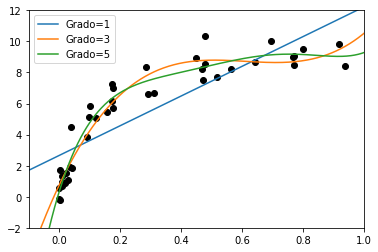

In [ ]:
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='Grado={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Lo que controla la complejidad del modelo en este caso es el grado del polinomio. ¬øqu√© grado de polinomio proporciona una compensaci√≥n adecuada entre el sesgo (subajuste) y la varianza (sobreajuste)?

Podemos visualizar la curva de validaci√≥n para este modelo y datos particulares; Esto se puede hacer directamente usando la funci√≥n validation_curve provista por Scikit-Learn. Dado un modelo, datos, nombre de par√°metro y un rango para explorar, esta funci√≥n calcular√° autom√°ticamente tanto el puntaje de entrenamiento como el puntaje de validaci√≥n en todo el rango

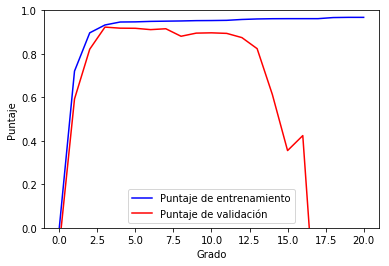

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(degree, np.median(val_score, 1), color='red', label='Puntaje de validaci√≥n')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

Esto muestra con precisi√≥n el comportamiento cualitativo que esperamos: el puntaje de entrenamiento es en todas partes m√°s alto que el puntaje de validaci√≥n; el puntaje de entrenamiento mejora monot√≥nicamente con una mayor complejidad del modelo; y la puntuaci√≥n de validaci√≥n alcanza un m√°ximo antes de caerse a medida que el modelo se sobreajusta.

A partir de la curva de validaci√≥n, podemos deducir que el equilibrio √≥ptimo entre sesgo y varianza se encuentra para un polinomio de tercer orden:

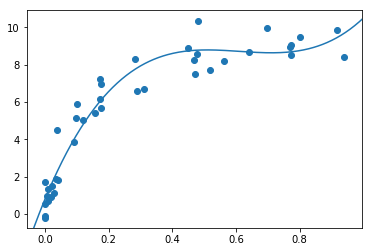

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## 1.4 Curvas de aprendizaje
<p><a name="lea_cur"></a></p>

[[Contenidos]](#contents)

Un aspecto importante de la complejidad del modelo es que el modelo √≥ptimo generalmente depender√° del tama√±o de los datos de entrenamiento. Por ejemplo, generemos un nuevo conjunto de datos con un factor de cinco puntos m√°s:


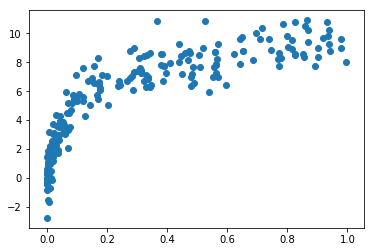

In [ ]:
X2, y2 = datos(200)
plt.scatter(X2.ravel(), y2);

Trazemos la curva de validaci√≥n

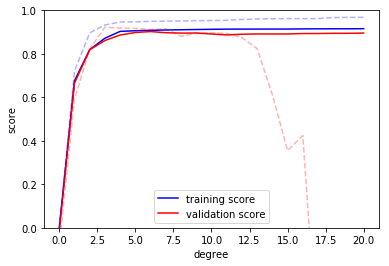

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Las l√≠neas continuas muestran los nuevos resultados, mientras que las l√≠neas discontinuas m√°s d√©biles muestran los resultados del conjunto de datos anterior m√°s peque√±o. A partir de la curva de validaci√≥n, es claro que el conjunto de datos m√°s grande puede admitir un modelo mucho m√°s complicado: el pico se da alrededor de un grado 6, pero incluso un modelo de grado 20 no est√° sobreajustando los datos: los puntajes de entrenamiento y de validaci√≥n est√°n muy cercanos. Por lo tanto, vemos que el comportamiento de la curva de validaci√≥n no tiene una sino dos entradas importantes: la complejidad del modelo y el n√∫mero de puntos de entrenamiento.

Scikit-Learn ofrece una pr√°ctica utilidad para calcular tales curvas de aprendizaje de sus modelos; Aqu√≠ calcularemos una curva de aprendizaje para nuestro conjunto de datos original con un modelo polinomial de segundo orden y un polinomio de noveno orden:

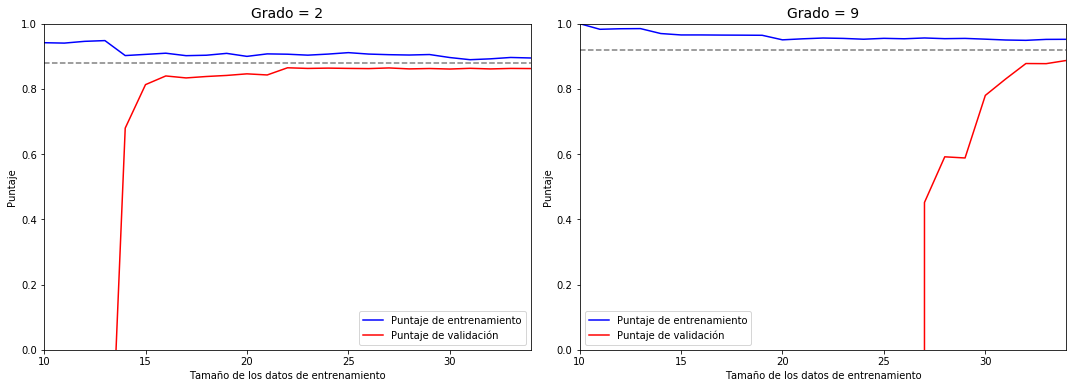

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Puntaje de entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Puntaje de validaci√≥n')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tama√±o de los datos de entrenamiento')
    ax[i].set_ylabel('Puntaje')
    ax[i].set_title('Grado = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Este es un diagn√≥stico valioso, porque nos da una descripci√≥n visual de c√≥mo nuestro modelo responde al aumento de los datos de entrenamiento. En particular, cuando la curva de aprendizaje ya ha convergido (es decir, cuando las curvas de entrenamiento y validaci√≥n ya est√°n cercanas entre s√≠), ¬°agregar m√°s datos de entrenamiento no mejorar√° significativamente el ajuste! Esta situaci√≥n se ve en el panel izquierdo, con la curva de aprendizaje para el modelo de grado 2.

Trazar una curva de aprendizaje para nuestra elecci√≥n particular de modelo y conjunto de datos puede ayudarnos a tomar una decisi√≥n sobre c√≥mo avanzar para mejorar el an√°lisis.

## 1.5 Bootstraping
<p><a name="bstrap"></a></p>

[[Contenidos]](#contents)

Tambi√©n nos es posible hacer la validaci√≥n del modelo haciendo un particionado de nuestros datos de tal forma que sea posible un remuestreo de los datos, con ello es posible generar estad√≠sticas con niveles de confianza, algo que no es posible si usamos otros m√©todos como CV.

La partici√≥n del dataset se har√≠a de la siguiente forma:



*   Seleccionar un tama√±o de muestra de entrenamiento que se desea.
*   Mientras el tama√±o sea menor que el tama√±o elegido.
  * Seleccionar una instancia de forma aleatoria y a√±adirla a la muestra.
* Todos los datos que no hayan sido elegidos para la muestra de entrenamiento ser√°n elegidos como muestra de test. A √©stos datos se les conoce generalmente como out of bags (fuera de la bolsa).

Note que en la selecci√≥n es posible que una instancia sea elegida m√°s de una vez para hacer parte de la muestra de entrenamieto, sin embargo jam√°s habr√°n instancias en ambas muestras (train, test).

As√≠ es posible generar estad√≠sticas de la robustes de nuestro algoritmo sobre datos nunca vistos.


En general entonces el procedimiento de validaci√≥n por bootstrap ser√°:



*   Elija un numero de repeticiones de bootstrap.
*   Elija un tama√±o de muestra. 
*   Para cada muestra de bootstrap.
  *  Haga una partici√≥n como se indic√≥ anteriormente.
  *  Entrene el modelo con la muestra de entrenamiento.
  *  Haga el estimado del error de predicci√≥n del modelo con la metrica elegida sobre la muestra de test.
* Calcume la media y la varianza de sus errores.

Una ventaja de √©ste m√©todo es que las estimaciones deben distribuirse de forma gaussiana.

**Tenga en cuenta que:**
El tama√±o elegido para la muestra del bootstrap por lo general es el mismo tama√±o del dataset, a menos que tengamos un dataset demasiado grande y su costo computacional sea excesivo, en dichos casos suele usarse al rededor de un 50%.

El numero de repeticiones debe ser grande, de tal forma que se genere estad√≠stica, se aconseja que como m√≠nimo sean 30 repeticiones.


![picture](https://d3ansictanv2wj.cloudfront.net/emlm_0302-6a388b903f6e1e04c95e718940eff039.png)




In [ ]:
from sklearn.utils import resample #metodo de muestreo con remplazo
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#crear la muestra de bootstrap 
boot = resample(data, replace=True, n_samples=5, random_state=3)
print('Bootstrap:',boot)
# out of bag 
oob = [x for x in data if x not in boot]
print('OOB:',oob)

Bootstrap: [0.3, 0.1, 0.2, 0.4, 0.1]
OOB: [0.5, 0.6]


Validemos con √©ste m√©todo sobre un modelo lineal de los creados en clases pasadas:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn import metrics


df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.dropna(inplace=True)
data= df[['ENGINESIZE','CO2EMISSIONS']].values

MAE = []
n_rep = 40

for i in range(n_rep):
  boot = resample(data, replace=True, n_samples=int(len(data)/2))
  oob = np.array([x for x in data if x.tolist() not in boot.tolist()])
   
  X_train = boot[:,0].reshape(-1,1)
  y_train = boot[:,1]
  X_test = oob[:,0].reshape(-1,1)
  y_test = oob[:,1]
  #entrenamos el modelo
  elastic = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
  elastic.fit(X_train,y_train)
  y_pred = elastic.predict(X_test)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  MAE.append(mae)

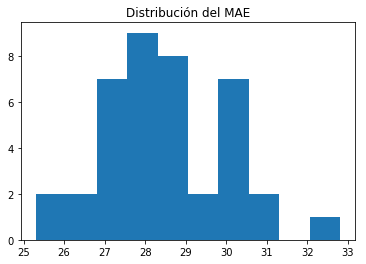

In [ ]:
import matplotlib.pyplot as plt
plt.hist(MAE)
plt.title(r'Distribuci√≥n del MAE')
plt.show()

In [ ]:
media = np.mean(MAE)
dstd = np.std(MAE)
print('Error MAE:',media,'+/-',dstd)

Error MAE: 28.490130084837098 +/- 1.5255413096410302


Como vemos es posible generar estad√≠sticas sobre nuestros errores y su distribuci√≥n, adem√°s de su intervalo de confianza, as√≠ podemos hacer afirmaciones con mayor certeza dobre la robustez de nuetro modelo.

## 1.6 Gridsearch para la optimizaci√≥n de hiper-par√°metros
<p><a name="gridsearch"></a></p>

[[Contenidos]](#contents)

Un paso fundamental en cualquier modelado es el ajuste de los hiper-par√°metros para generar un modelo cuya compenzaci√≥n sesgo/varianza sea optima.

La idea b√°sica es, como se hizo en la sesi√≥n pasada, explorar un amplio espacio de hiper-par√°metros haciendo combinaciones posibles de ellos y usando alguna metrica escoger el mejor posible.

En scikit-learn nos es posible hacerlo de dos formas:



*   Haciendo un barrido completo de las combinaciones de hiper-par√°metros (GridSearchCV)
*   Haciendo un barrido aleatorio de las combinaciones de hiper-par√°metros (RandomizedSearchCV)

El primero es √∫til si deseamos tener un conocimiento mejor de nuestro espacio de hiper-par√°metros, pero no es aconsejable si son demasiadas combinaciones o si nuestro algoritmo es lento en entrenamiento.
Ambos m√©todos los encontrar√©mos en 'sklearn.model_selection'


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)


# creamos los diccionarios sobre los que exploraremos
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


#para ver las posibles metricas: https://scikit-learn.org/stable/modules/model_evaluation.html

clf = GridSearchCV(SVR(), tuned_parameters, cv=5,scoring= 'r2')
clf.fit(X_train, y_train)

print("Mejor conjunto de par√°metros:")
print()
print(clf.best_params_)
print()
print("Media y desviaci√≥n:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


Mejor conjunto de par√°metros:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Media y desviaci√≥n:

0.037 (+/-0.029) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.011 (+/-0.032) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.396 (+/-0.041) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.038 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.746 (+/-0.036) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.398 (+/-0.042) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.762 (+/-0.035) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.746 (+/-0.035) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.761 (+/-0.035) for {'C': 1, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 100, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}


#### Ejercicio:

1. En el dataset de autos (a1): elimine los datos faltantes, convierta las variables categoricas en variables dummies (a2), y separe el dataset en datos de entrenamiento y prueba.

2. Use GridSearchCV para explorar el espacio de hiper-par√°metros compuesto por $\alpha$ en la lista [0.01,0.1,1,10,100,1000] y l1_ratio en [0.1,0.3,0.6,0.9,0.99,0.999], entrenando  ElasticNet y evaluandolo con RMSE. 

3. ¬øCu√°l es el mejor conjunto de hiper-par√°metros?, ¬øcu√°l es la media y la desviaci√≥n del error en cada conjunto de hiper-par√°metros?.


a1. 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

a2. `pd.get_dummies()`



# 2. Clasificaci√≥n:
<p><a name="intro"></a></p>

[[Contenidos]](#contents)


El el objetivo en la **clasificaci√≥n** es predecir una clase, que corresponde a una opci√≥n entre una lista predefinida de posibilidades. El problema de clasificaci√≥n puede separarse en dos categor√≠as:

* Clasificaci√≥n binaria: cuyo proposito consiste en estimar si una instacia corresponde a una clase de dos posibles. La clasificaci√≥n binaria puede pensarsar como el dar respuesta de si o no a una pregunta; clasificar un paciente como enfermo o sano, respecto a una enfermedad; clasificar un correo como spam o no; etc.

* Clasificaci√≥n multi-clase: en donde se estima si una instacia corresponde a una clase de mas de dos clases posibles. Algunos ejemplos de clasificaci√≥n multi-clases en ML consiten en la clasificaci√≥n de plantas de diferentes especies; clasificaci√≥n para predecir el lenguaje de una determinada p√°gina Web; etc.

Recordemos que el problema de **regresi√≥n**  consiste en la determinaci√≥n de una una variable objetivo continua, mientras que en el problema de **clasificaci√≥n** se busca poner un conjunto de etiquetas finitas a las instancias de la tabla.

## 2.1 Clasificador: M√°quina de soporte vectorial

<p><a name="svm"></a></p>

[[Contenidos]](#contents)

Supogamos que tenemos un dataset con dos caracter√≠sticas y  queremos clasificar con una l√≠nea recta (hiperplano en el caso de mas dimensiones) a que grupo (rojos o azules) corresponde cada uno. 

<p><img height="230px" src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"  hspace="10px" vspace="0px">
  <img height="230px" src="https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png"  hspace="10px" vspace="0px"></p>


En la figura de la izquierda, podemos ver que tenemos "infinitas" rectas que sirven para clasificar los dos grupos. En SVM escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que est√°n mas cerca de la frontera (l√≠nea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la l√≠nea de frontera o fuera de ella. En la figura de la derecha son datos que aparecen con el color relleno.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"
import mlutils

--2019-09-13 21:54:39--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‚Äòmlutils.py.3‚Äô

mlutils.py.3        100%[===================>]  10.44K  --.-KB/s    in 0s      

2019-09-13 21:54:39 (89.5 MB/s) - ‚Äòmlutils.py.3‚Äô saved [10691/10691]



In [ ]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

### Clasificador Lineal binario

In [ ]:
X,y = make_blobs(400, centers=2, cluster_std=1, random_state=0)
X.shape, y.shape


((400, 2), (400,))

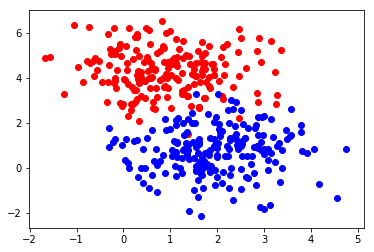

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

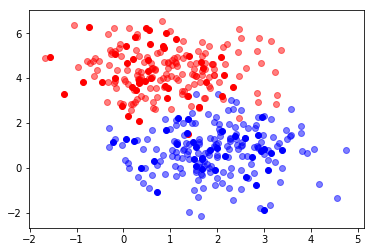

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="red", alpha=0.5)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="blue", alpha=0.5)

plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="red")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="blue")

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

C= 0.01
score_train 0.953125
score_test 0.95


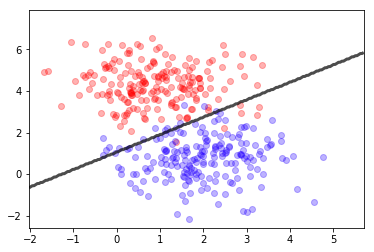

C= 0.1
score_train 0.971875
score_test 0.9875


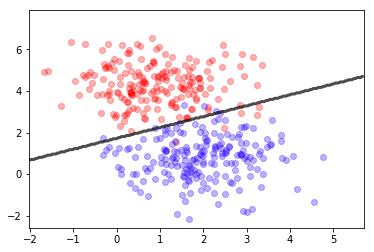

C= 1.0
score_train 0.978125
score_test 0.975


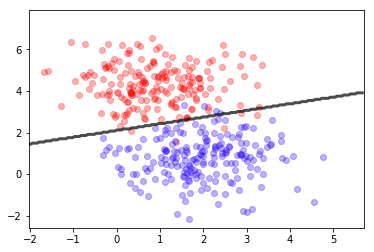

C= 10.0
score_train 0.98125
score_test 0.975


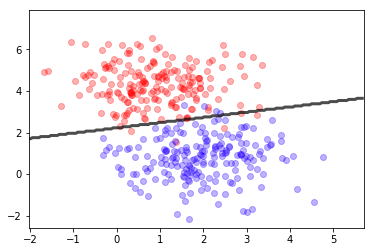

In [ ]:
for C_param in np.array([0.01,0.1,1.0,10]):
  sv = LinearSVC(C=C_param, max_iter=10000)
  sv.fit(X_train,y_train)
  print ("C=", C_param)
  print ("score_train",sv.score(X_train,y_train))
  print ("score_test",sv.score(X_test,y_test))
  mlutils.plot_2Ddata(X, y, dots_alpha=.3)
  mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                   line_width=3, line_alpha=.7, label=None)
  plt.show()


Para LinearSVC el par√°metro C determina la regularizaci√≥n. Valores altos de C corresponden con baja regularizaci√≥n. En otras pal√°bras, para valores altos de C el algoritmo trata de ajustarse al set de entrenamiento lo mejor posible, mientras que para valores bajos de C, el algoritmo agrega penalidad a los pesos altos, similar a la funci√≥n del hiperpar√°metro $\alpha$ en la regresi√≥n de Ridge.


Si usamos el m√©todo SVC con kernel lineal, podemos ver cuantos y  cuales son los vectores de soporte que est√° utilizando el algoritmo.

number of support vectors 27


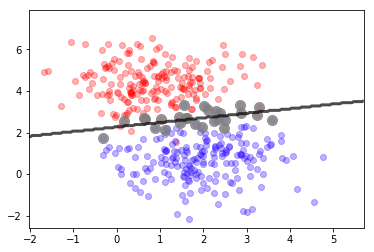

In [ ]:
sv = SVC(kernel='linear')
sv.fit(X_train,y_train)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

### Clasificador Lineal M√∫lticlase

In [ ]:
!pip install mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


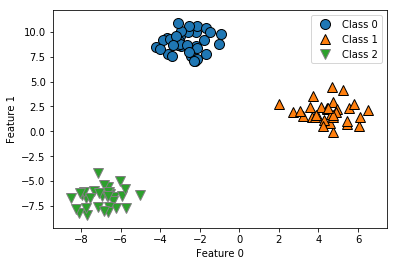

In [ ]:
import mglearn
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()


Como en este caso son tres clases, lo que tenemos es un clasificador lineal para cada una de ellas

In [ ]:
linear_svm = LinearSVC().fit(X, y)

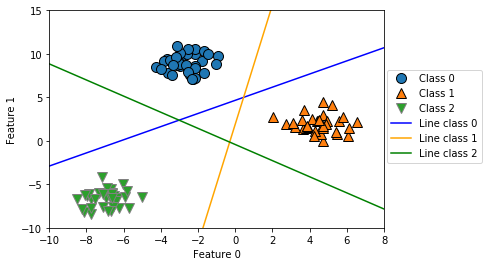

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'orange', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

en este punto nos podemos preguntar: ¬øQu√© pasa con los puntos que pueden estar dentro del tri√°ngulo formado por las intersecciones? Esos puntos se clasificar√°n dependiendo de la l√≠nea que tengan m√°s cercana.   


In [ ]:
mglearn.plots.plot_2d_classification?

Text(0, 0.5, 'Feature 1')

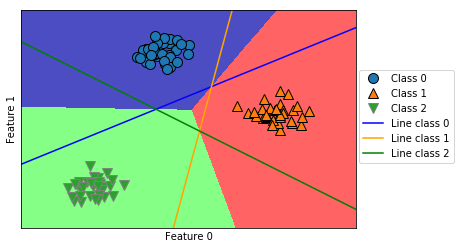

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'orange', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### Clasificador no lineal

Igual a como vimos en la regresi√≥n usando m√°quinas de soporte vectorial, "el truco" para resolver problemas de clasificaci√≥n que no sean lineales, es usando un kernel que mapea los datos a un espacio de mayor dimensionalidad.   

Text(0, 0.5, 'Feature 1')

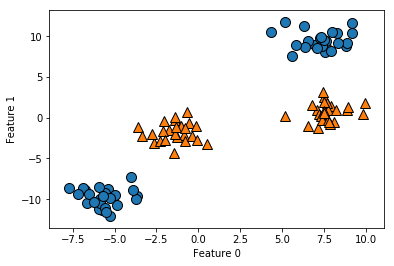

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

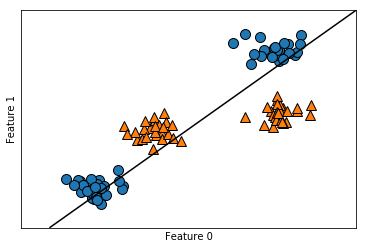

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0.5, 0, 'feature1 ** 2')

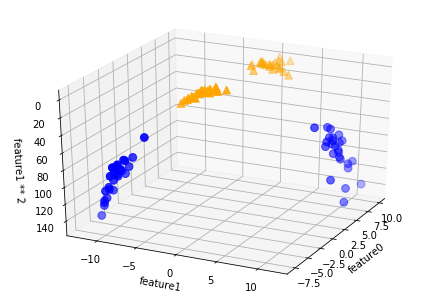

In [ ]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='orange', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0 ** 2')

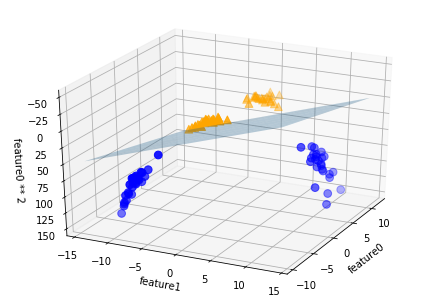

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='orange', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


Text(0, 0.5, 'Feature 1')

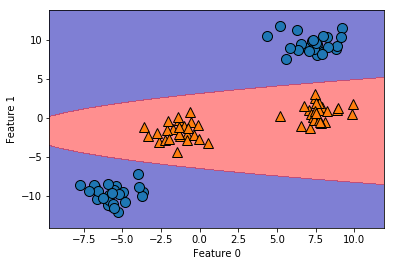

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Usando los kernel
Igual que para la regresi√≥n, los kernel disponibles en sklearn son lineal ('linear'), polin√≥mico ('poly'), funci√≥n de base radial ('rbf'), sigmoide('sigmoid'). El hiperpar√°metro $\gamma$ est√° asociado a los coeficientes de los kernel. Veamos por ejempƒ∫o en el caso del kernel de base radial (RBF) $K_{rbf}=\exp(-\gamma |x_1-x_2|^2)$ la dependencia de $\gamma$ en la clasificaci√≥n. En este caso lo podemos interpretar como *cuanto de cercanos han de estar dos puntos para considerarlos similares*






In [ ]:
X,y = make_moons(400, noise=0.1, random_state=10)

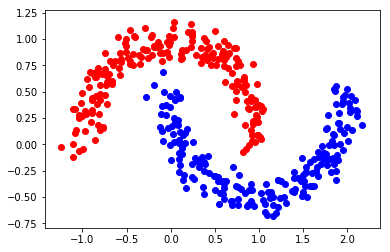

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

$\gamma$ peque√±o

score_train 0.821875
score_test 0.9125
number of support vectors 198


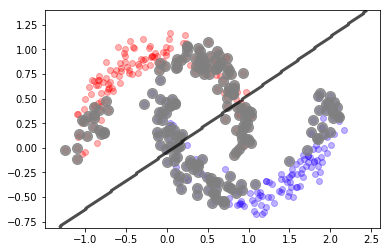

In [ ]:
sv = SVC(gamma=1e-2)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

$\gamma$ mediano

score_train 0.996875
score_test 1.0
number of support vectors 47


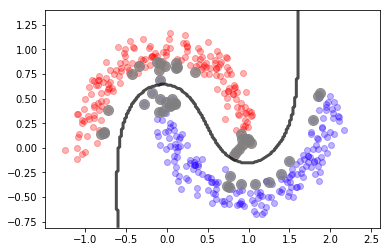

In [ ]:
sv = SVC(gamma=1)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

$\gamma$ grande

score_train 1.0
score_test 1.0
number of support vectors 211


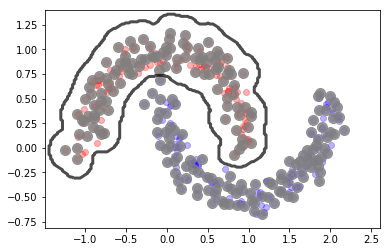

In [ ]:
sv = SVC(gamma=100)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

## 2.2. Regresi√≥n Log√≠stica:
<p><a name="reg_log"></a></p>

[[Contenidos]](#contents)

Como se ha mencionado, algunos algoritmos de regresi√≥n pueden ser usados para el problema de clasificaci√≥n. La **Regresi√≥n Log√≠stica** se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular. 

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresi√≥n log√≠stica, tenemos entonces que el problema de clasificaci√≥n binario se trata de la siguiente forma:

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

Sin entrar en detalles, la probabilidad estimada de $y$ dado x, es tal que 

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

En donde, $\sigma(.)$ representa la funci√≥n log√≠stica, o sigmoide, mediante la cual se obtiene un resultado que esta entre 0 y 1. En la regresi√≥n log√≠stica **la probabilidad se ajusta a una funci√≥n sigmoide/log√≠stica para realizar el mapeo a probabilidades**. Esta funci√≥n est√° definida por la ecuaci√≥n:

\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}

Veamos la apariencia que presenta esta funci√≥n:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definici√≥n de la funci√≥n sigmoide/log√≠stica:

def sigmoide(x):
    output = np.exp(x)/(1+np.exp(x))
    return output

Text(0.5, 1.0, 'Funci√≥n log√≠stica o sigmoide')

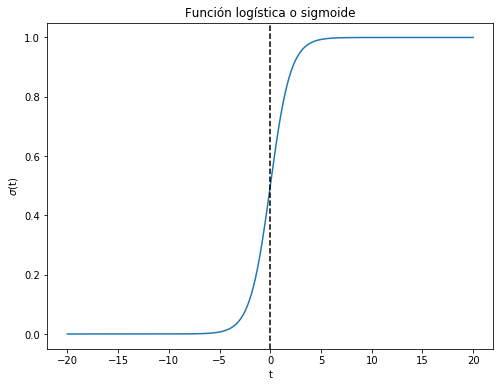

In [ ]:
x = np.linspace(-20,20,400)
y=sigmoide(x)

plt.figure(figsize=(8,6))

plt.plot(x,y)
plt.axvline(x=0,color='k',linestyle='--')
plt.xlabel("t")
plt.ylabel("$\sigma$(t)")
plt.title("Funci√≥n log√≠stica o sigmoide")

obre la funci√≥n sigmoide podemos advertir varias cosas:

* La funci√≥n sigmoide tiende r√°pidamenta a cero para valores negativos.
* La funci√≥n sigmoide tiende r√°pidamente a 1 para valores positivos.
* $\sigma(t)<0.5$ si $t<0$.
* $\sigma(t)\geq0.5$ si $t\geq0$.

De los dos √∫ltimos √≠tems se tiene que nuestro modelo de regresi√≥n log√≠stica predice un valor 1 si $\mathbf{x}^T\mathbf{w}$ es positivo y cero si es negativo.

### Regresi√≥n log√≠stica vs regresi√≥n lineal

Recordemos que en la **regresi√≥n lineal** se determina una funci√≥n que relaciona a una variable dependiente continua, con algunos predictores (variables independientes $x_1$, $x_2$, etc.). Por ejemplo, en la regresi√≥n lineal multiple se asume una funci√≥n de la forma:


\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

en la que se determinan los valos de los par√°metos $w$'s que minimizan el error. Lo anterior puede generalizarse como:


\begin{equation}
‚Ñé_w(ùë•) = \mathbf{x}^T\mathbf{w}
\end{equation}

La regresi√≥n log√≠stica es una variaci√≥n de la regresi√≥n lineal, la cual resulta √∫til en los casos en que la variable dependiente, $\mathbf{y}$, es categ√≥rica. Como se mencion√≥, la regresi√≥n log√≠stica produce un resultado de la probabilidad que una instancia pertenezca a un clase dada.

La regresi√≥n log√≠stica ajusta entonces una curva en forma de "S", tomando la regresi√≥n lineal ($\mathbf{x}^T\mathbf{w}$) y transformando la estimaci√≥n num√©rica en una probabilidad (entre 0 y 1), mediante la funci√≥n sigmoide:

$$
‚Ñé_w(ùë•) = \sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {e^{(w_0 + w_1  x_1 + w_2  x_2 +...)}}{1 + e^{(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}}
$$
Or:
$$
\text{Probabilidad_Clase_1} =  P(Y=1|X) = \sigma({\mathbf{x}^T\mathbf{w}}) = \frac{e^{\mathbf{x}^T\mathbf{w}}}{1+e^{\mathbf{x}^T\mathbf{w}}} 
$$

En esta ecuaci√≥n se tiene que, $\mathbf{x}^T\mathbf{w}$ es el resultado de la regresi√≥n (es decir, la suma de las variables/caracter√≠sticas pesadas por los coeficientes), `exp` representa la funci√≥n exponencial, $\sigma(\mathbf{x}^T\mathbf{w})$ es la [funci√≥n log√≠stica](http://en.wikipedia.org/wiki/Logistic_function).

De forma sucinta, la regresi√≥n log√≠stica toma la entrada (argumento) de la funci√≥n sigmoide/log√≠stica y para obtener un resultado de probabilidades:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

**Nota**: No deje confundirse visualmente pensando que la sigmoide corresponde a la frontera de decisici√≥n. Los datos que se muestran en la gr√°fica anterior corresponden a dos grupos (0 y 1), y el ajuste lineal de estos es el que se pasa a la funci√≥n sigmoide para mapearlos a probabilidades 


El proposito del algoritmo de __Regresi√≥n L√≥gistica__ es el de encontrar los par√°metros $\mathbf{w}$, para  $‚Ñé_w(ùë•)$ = $\sigma(\mathbf{x}^T\mathbf{w})$, de tal forma que el modelo prediga m√°s precisamente la clase en cada caso.

El modelo de regresi√≥n log√≠stica representa entonces un algoritmo apliamente usado en clasificaci√≥n binaria, en los casos en que la frontera de decisi√≥n sea lineal.

Veamos a continuaci√≥n el desempe√±o de la regresi√≥n logistica en la clasificaci√≥n de tres distribuciones:

* Regresi√≥n log√≠stica en un problema de clasificaci√≥n binaria con una frontera de decisici√≥n lineal.
* Regresi√≥n log√≠stica en un problema de clasificaci√≥n binaria con una forntera de desici√≥n no lineal. 

### Regresi√≥n log√≠stica en un problema de clasificaci√≥n binaria con una frontera de decisi√≥n lineal.

Para evaluar los casos en el que una regresi√≥n log√≠stica tiene un buen desempe√±o, veamos las siguientes distribuci√≥nes de datos generadas en python:

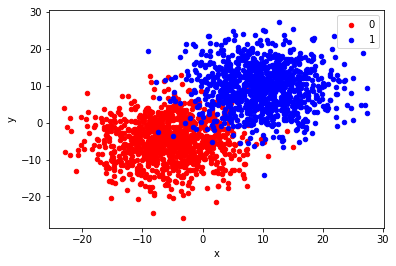

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import DataFrame

# Generaci√≥n de un dataset de clasificaci√≥n 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

La **apariencia del dataset** es la de una tabla con dos caracter√≠sticas, o variables independientes, y una variable objetivo, o variable dependiente:

In [ ]:
df.head(10)

x          y  label
0   3.638509  10.367086      1
1  19.869574   6.554166      1
2  -3.596134   0.146057      0
3 -11.827598  -8.025380      0
4  -3.935786 -11.372476      0
5   0.016425  -4.886311      0
6  -4.616008  -5.792576      0
7  -3.427720 -16.442486      0
8  -9.197854  -3.219251      0
9  24.958239   0.800719      1

Las variables independiente est√°n etiquetadas en las columnas como las "caracter√≠sticas" $\mathbf{x}$ e $\mathbf{y}$, a pesar de que hemos insistido a lo largo del curso reservar la letra $\mathbf{y}$ para la variable objetivo o dependiente. En este caso, la variable objetivo est√° etiquetada como **label**.

A continuaci√≥n, veamos los resultados de la clasificaci√≥n derivada de una regresi√≥n log√≠stica. Los datos son graficados sobre un contorno que representa la probabilidad de pertenecer a una clase u otra:
 * Los tonos rojos, corresponden a regiones de probalidad menores a 0.5 de pertenecer a la clase 1.
 * Los tonos azules, corresponden a regiones de probabilid  mayores a 0.5 de pertenecer a la clase 1.
 * Los valores en blanco, representan la forntera de decisi√≥n, es decir donde se obtiene una probabilidad del 0.5 de pertenencia a la clase 1.

Train set: (1600, 2) (1600,)
Test set: (400, 2) (400,)


[(-22.981715497289997, 27.37181699382255),
 Text(0, 0.5, '$X_2$'),
 (-25.814445291719665, 27.365133706091257),
 Text(0.5, 0, '$X_1$'),
 None]

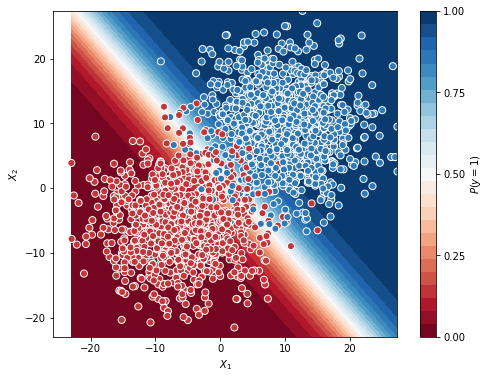

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Divisi√≥n de los datos en subconjuntos de entrenamiento/evaluaci√≥n.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

Evaluemos ahora la presici√≥n del modelo creado mediante regresi√≥n log√≠stica, realizando una validaci√≥n cruzada:

In [ ]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada con tres folds
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validaci√≥n cruzada son:", cv_scores)


Los puntajes de la validaci√≥n cruzada son: [0.95958084 0.94294294 0.93993994]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Conclusi√≥n:** En los casos en donde la **frontera de decisi√≥n** corresponde a una **l√≠nea recta**, el algoritmo de desici√≥n log√≠stica presenta un excelente desempe√±o en la clasificaci√≥n de los datos; de hecho, hemos obtenido un porcentaje de clasificaciones correctas del 95%, mediante una evaluaci√≥n cruzada con tres folds.

### Regresi√≥n log√≠stica en un problema de clasificaci√≥n binaria con frontera de decisi√≥n no lineal I.

Para evaluar los casos en el que una regresi√≥n log√≠stica tiene un buen desempe√±o, veamos el siguiente caso de distribuci√≥n de datos generadas en python:

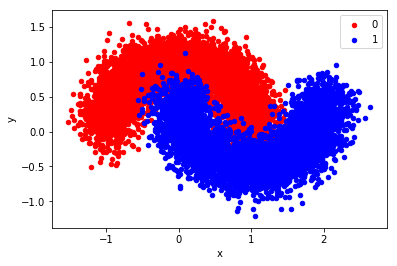

In [ ]:
from sklearn.datasets import make_moons

# generate 2d classification dataset
X, y = make_moons(n_samples=10000, noise=0.2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


[(-1.212651923120385, 1.5863090243750573),
 Text(0, 0.5, '$X_2$'),
 (-1.5237216936143902, 2.6402369251882014),
 Text(0.5, 0, '$X_1$'),
 None]

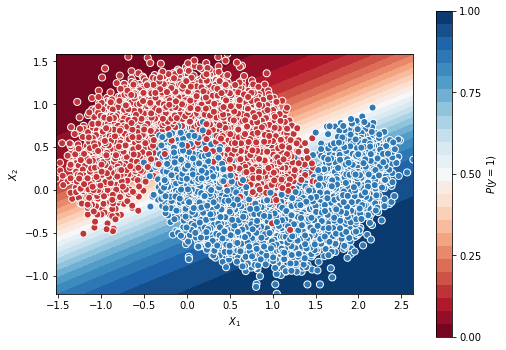

In [ ]:
# Divisi√≥n de los datos en subconjuntos de entrenamiento/evaluaci√≥n.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

In [ ]:
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validaci√≥n cruzada son:", cv_scores)

Los puntajes de la validaci√≥n cruzada son: [0.86442711 0.85392921 0.85384154]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Conclusi√≥n:** En los casos en donde la **frontera de decisi√≥n** no es lineal y los datos estan distribuidos en "cachos de luna", el algoritmo de desici√≥n log√≠stica presenta un desempe√±o menos preciso; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 86%, mediante una evaluaci√≥n cruzada con tres folds.

### Regresi√≥n log√≠stica en un problema de clasificaci√≥n binaria con frontera de decisi√≥n no lineal II.

Veamos un √∫ltimo caso en el que los datos est√°n organizados en anillos:

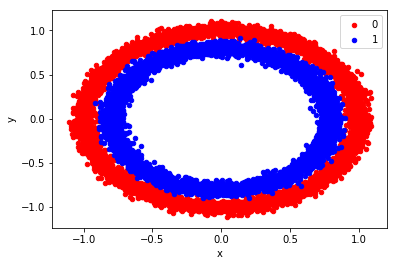

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=10000, noise=0.04)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


[(-1.1123006183092397, 1.1051398563321988),
 Text(0, 0.5, '$X_2$'),
 (-1.1107932613588891, 1.0916309024161017),
 Text(0.5, 0, '$X_1$'),
 None]

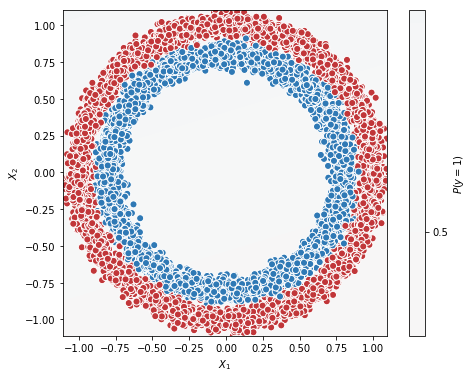

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

En este caso, asigna a todos los puntos una probabilidad cercana a 0.5, lo que indica una mala clasificaci√≥n, ya que todos los puntos estar√≠an dentro de la frontera de decisi√≥n.

In [ ]:
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validaci√≥n cruzada son:", cv_scores)

Los puntajes de la validaci√≥n cruzada son: [0.49490102 0.48380324 0.48589436]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Conclusi√≥n:** En los casos en donde la **frontera de decisi√≥n** no es lineal para datos distribuidos en anillos concentricos, el algoritmo de regresi√≥n log√≠stica presenta un desempe√±o muy pobre; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 49%, mediante una evaluaci√≥n cruzada con tres folds.

#### Ejercicio: 

De las siguiente base de datos de una empresa de telecomunicaciones, construya un modelo de regresi√≥n log√≠tica que prediga el abandono del cliente (variable churn), siguiendo los pasos que se enumeran a continuaci√≥n:

1. Cargue la base de datos de la direcci√≥n "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv" y visualice los datos.
2. Guarde en un nuevo dataset las caracter√≠sticas `['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']`. La variable churn representa el abandono; consulte el tipo de esta variable y en caso de no ser `int` convirtala a este tipo.
3. Visualice el n√∫mero de elementos total de la nuevo tabla.
4. Guarde las variables predictoras (todas menos churn) como un array en una variable X y la variable objetivo (churn), como array tambi√©n, en una variable y.
5. Normalice la variable x y ajuste los datos.
6. Realice un ajuste mediante regresi√≥n log√≠stica de los datos, usando 5 folds y evaluando el puntaje obtenido promedio.